In [1]:
import requests
import json
import string
from nltk.corpus import stopwords
from collections import deque
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import date
import os

In [27]:
def dameTitulares(URL, auxTag, auxClase):
    print(f"Filtrando resultados do medio: {URL}")
    _parser = BeautifulSoup(requests.get(URL).content, "html.parser")
    _titulares = _parser.find_all(auxTag, class_=auxClase)
    pilaTitulares = deque()
    enlace = ""

    for _auxTit in _titulares:

        # OJO: añado la URL antes del enlace ya que viene la ruta relativa sólo
        if _auxTit.find("a").get("href")[0] == "/":
            enlace = URL+_auxTit.find("a").get("href")
        else:
            enlace = _auxTit.find("a").get("href")
            
        pilaTitulares.append([_auxTit.text.strip(),
                               enlace])
    return (pilaTitulares)

# Lectura do arquivo json cargando os datos na variable URLS
with open("medios.json", "r") as f:
    URLS = json.load(f)

print(URLS)


{'La Voz de Galicia': {'url': 'https://www.lavozdegalicia.es', 'tag': 'h4', 'clase': 'a-min-headline'}, 'El País': {'url': 'https://www.elpais.com', 'tag': 'h2', 'clase': 'c_t'}, 'El Mundo': {'url': 'https://www.elmundo.es', 'tag': 'h2', 'clase': 'ue-c-cover-content-link'}, 'La Vanguardia': {'url': 'https://www.lavanguardia.com/', 'tag': 'div', 'clase': 'article-details'}, 'ABC': {'url': 'https://www.abc.es/', 'tag': 'h2', 'clase': 'voc-title voc-title--s18-fxs20'}, 'El Economista': {'url': 'https://www.eleconomista.es/', 'tag': 'div', 'clase': 'articleHeadline'}, 'Vozpopuli': {'url': 'https://www.vozpopuli.com/', 'tag': 'div', 'clase': 'post-content'}}


In [28]:
allTitulares = deque()
enderezos = json.loads(json.dumps(URLS))

for auxURL in enderezos:
    allTitulares.append(
        dameTitulares(
        enderezos[auxURL]['url'], 
        enderezos[auxURL]['tag'], 
        enderezos[auxURL]['clase']))
    
for auxTitular in allTitulares:
    print(auxTitular)

Filtrando resultados do medio: https://www.lavozdegalicia.es
Filtrando resultados do medio: https://www.elpais.com
Filtrando resultados do medio: https://www.elmundo.es
Filtrando resultados do medio: https://www.lavanguardia.com/
Filtrando resultados do medio: https://www.abc.es/
Filtrando resultados do medio: https://www.eleconomista.es/
Filtrando resultados do medio: https://www.vozpopuli.com/
deque([['El BCE congela por tercera vez los tipos de interés en el 4,5 %', 'https://www.lavozdegalicia.es/noticia/economia/2024/01/25/bce-congela-tercera-vez-tipos-interes-45/00031706184122658841463.htm'], ['El CIS da la victoria en las elecciones gallegas al PP, pero podría perder la absoluta', 'https://www.lavozdegalicia.es/noticia/elecciones-gallegas-18F/2024/01/25/cis-da-victoria-elecciones-gallegas-pp-perder-mayoria-absoluta/00031706178756541473253.htm'], ['La hermana del asesinado en Salceda: «Que sigan investigando para dar con quién ordenó el crimen»', 'https://www.lavozdegalicia.es/not

## TOP 10 palabras más repetidas

> Primeramente saco los titulares de los deques y los junto en un texto separados por líneas

In [5]:
texto_titulares = ""

for auxTitular in allTitulares:
    if len(auxTitular) != 0:
        for titular in auxTitular:
            texto_titulares += f"{titular[0]}\n" # Cogiendo el primer elemento ya que el segundo es el enlace

print(texto_titulares)

El BCE congela por tercera vez los tipos de interés en el 4,5 %
El CIS da la victoria en las elecciones gallegas al PP, pero podría perder la absoluta
La hermana del asesinado en Salceda: «Que sigan investigando para dar con quién ordenó el crimen»
Dirigentes del PSOE reprenden a Page y Feijoo elogia a los «presidentes autonómicos que no se callan»
El juez impide que la Seguridad Social obligue a una limpiadora viguesa con cáncer a volver a trabajar
Niebla de radiación: el fenómeno detrás del accidente con tres muertos en Ciudad Real
Los agricultores franceses desvalijan camiones españoles y queman la fruta que transportaban
Asfixia con nitrógeno, el nuevo método de ejecución en Alabama
El juez García Castellón acusa a Puigdemont por un delito de terrorismo no amnistiable
El plan de refuerzo de matemáticas y lectura llegará a todos los colegios públicos y concertados en primaria, ESO, FP básica y bachillerato
Le niegan en A Coruña el título de Enfermería al tener antecedentes por delit

### Generación de lista de signos de puntuación

In [6]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

### Listado de palabras a eliminar

In [7]:
stop_words = stopwords.words('spanish')

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

### Reemplazo de signos de puntuación y palabras a eliminar por ""

In [8]:
for sw in stop_words:
    clean_texto = texto_titulares.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")

#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

clean_texto

'bce congela tercera vez tipos interés 45 cis da victoria elecciones gallegas pp podría perder absoluta hermana asesinado salceda sigan investigando dar quién ordenó crimen dirigentes psoe reprenden page feijoo elogia presidentes autonómicos callan juez impide seguridad social obligue limpiadora viguesa cáncer volver trabajar niebla radiación fenómeno detrás accidente tres muertos ciudad real agricultores franceses desvalijan camiones españoles queman fruta transportaban asfixia nitrógeno nuevo método ejecución alabama juez garcía castellón acusa puigdemont delito terrorismo amnistiable plan refuerzo matemáticas lectura llegará colegios públicos concertados primaria fp básica bachillerato niegan coruña título enfermería tener antecedentes delitos sexuales juez cita imputado negreira tras descartar incapacitado declarar isco revela iago aspas llamó fichara celta enero 2023 inteligencia artificial oportunidad búsqueda empleo fin semana entroidos marcha media galicia rebeca cuenta histori

## Creación de la lista de palabras

In [9]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas y muy largas

for palabra in lista_texto:
    if (len(palabra)>=4 and len(palabra)<18):
        palabras.append(palabra)

palabras

['congela',
 'tercera',
 'tipos',
 'interés',
 'victoria',
 'elecciones',
 'gallegas',
 'podría',
 'perder',
 'absoluta',
 'hermana',
 'asesinado',
 'salceda',
 'sigan',
 'investigando',
 'quién',
 'ordenó',
 'crimen',
 'dirigentes',
 'psoe',
 'reprenden',
 'page',
 'feijoo',
 'elogia',
 'presidentes',
 'autonómicos',
 'callan',
 'juez',
 'impide',
 'seguridad',
 'social',
 'obligue',
 'limpiadora',
 'viguesa',
 'cáncer',
 'volver',
 'trabajar',
 'niebla',
 'radiación',
 'fenómeno',
 'detrás',
 'accidente',
 'tres',
 'muertos',
 'ciudad',
 'real',
 'agricultores',
 'franceses',
 'desvalijan',
 'camiones',
 'españoles',
 'queman',
 'fruta',
 'transportaban',
 'asfixia',
 'nitrógeno',
 'nuevo',
 'método',
 'ejecución',
 'alabama',
 'juez',
 'garcía',
 'castellón',
 'acusa',
 'puigdemont',
 'delito',
 'terrorismo',
 'amnistiable',
 'plan',
 'refuerzo',
 'matemáticas',
 'lectura',
 'llegará',
 'colegios',
 'públicos',
 'concertados',
 'primaria',
 'básica',
 'bachillerato',
 'niegan',
 'co

### Contador de palabras

In [10]:
word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        # Va sumando el número de veces que se repite la palabra
        word_count[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        word_count[palabra]=[1]

word_count

{'congela': [1],
 'tercera': [2],
 'tipos': [3],
 'interés': [3],
 'victoria': [1],
 'elecciones': [3],
 'gallegas': [1],
 'podría': [2],
 'perder': [3],
 'absoluta': [3],
 'hermana': [1],
 'asesinado': [2],
 'salceda': [1],
 'sigan': [1],
 'investigando': [1],
 'quién': [4],
 'ordenó': [1],
 'crimen': [2],
 'dirigentes': [1],
 'psoe': [4],
 'reprenden': [1],
 'page': [3],
 'feijoo': [2],
 'elogia': [1],
 'presidentes': [1],
 'autonómicos': [2],
 'callan': [1],
 'juez': [9],
 'impide': [2],
 'seguridad': [2],
 'social': [1],
 'obligue': [1],
 'limpiadora': [1],
 'viguesa': [1],
 'cáncer': [2],
 'volver': [2],
 'trabajar': [1],
 'niebla': [3],
 'radiación': [1],
 'fenómeno': [1],
 'detrás': [1],
 'accidente': [3],
 'tres': [5],
 'muertos': [2],
 'ciudad': [4],
 'real': [6],
 'agricultores': [2],
 'franceses': [2],
 'desvalijan': [1],
 'camiones': [1],
 'españoles': [3],
 'queman': [1],
 'fruta': [1],
 'transportaban': [1],
 'asfixia': [4],
 'nitrógeno': [3],
 'nuevo': [13],
 'método': [

### Generación de DataFrame apartir del diccionario

In [11]:
df_titulares = pd.DataFrame.from_dict(word_count, orient="index", columns=["ocurrencias"])
df_titulares

,ocurrencias
congela,1
tercera,2
tipos,3
interés,3
victoria,1
...,...
recursos,1
online,2
distancia,2
marketing,1


## Gráfico de barras con las 10 palabras más repetidas

> Primero ordenaré el dataframe por mayor número de ocurrencias

In [12]:
df_titulares.sort_values("ocurrencias", ascending=False, inplace=True)

> Creo una función que realice el gráfico de barras con el dataframe de titulares y el top 10 como valores por defecto

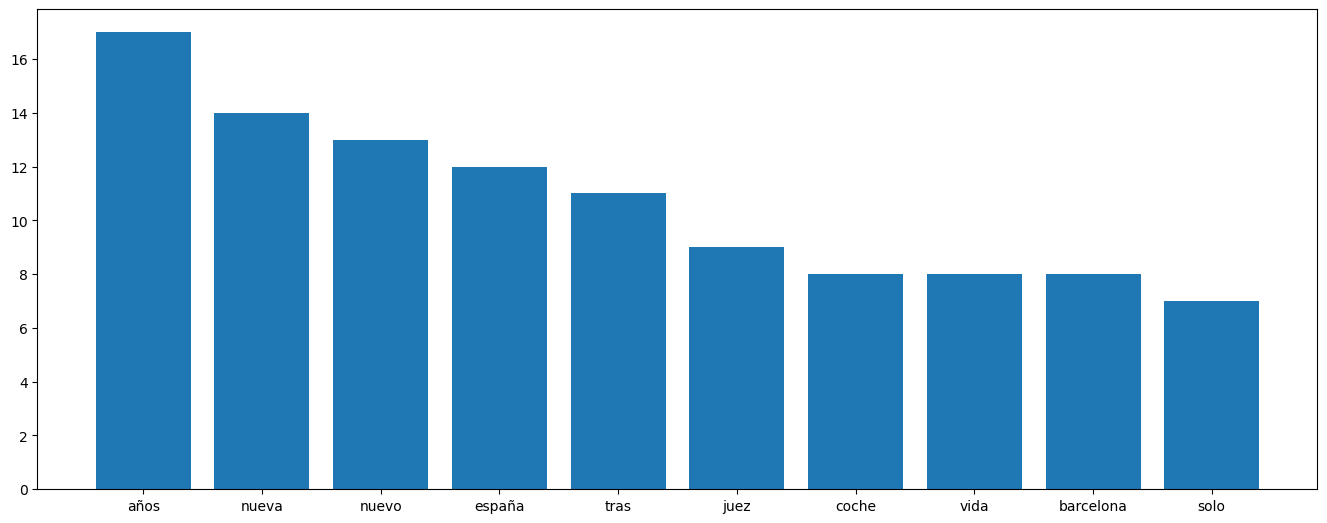

In [13]:
def plot_bar(data=df_titulares, top=10):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df_titulares.iloc[:top,:].index, height = df_titulares.iloc[:top,0].values)
    plt.show()

plot_bar()

## Creación de archivo HTML

> Recogemos todos los titulares en una lista

In [29]:
lista_titulares = []

for auxTitular in allTitulares:
    if len(auxTitular) != 0:
        for titular in auxTitular:
            lista_titulares.append(titular) # Cogiendo el primer elemento ya que el segundo es el enlace

lista_titulares

[['El BCE congela por tercera vez los tipos de interés en el 4,5 %',
  'https://www.lavozdegalicia.es/noticia/economia/2024/01/25/bce-congela-tercera-vez-tipos-interes-45/00031706184122658841463.htm'],
 ['El CIS da la victoria en las elecciones gallegas al PP, pero podría perder la absoluta',
  'https://www.lavozdegalicia.es/noticia/elecciones-gallegas-18F/2024/01/25/cis-da-victoria-elecciones-gallegas-pp-perder-mayoria-absoluta/00031706178756541473253.htm'],
 ['La hermana del asesinado en Salceda: «Que sigan investigando para dar con quién ordenó el crimen»',
  'https://www.lavozdegalicia.es/noticia/vigo/o-porrino/2024/01/25/hermana-joven-asesinado-salceda/00031706184961178832945.htm'],
 ['Dirigentes del PSOE reprenden a Page y Feijoo elogia a los «presidentes autonómicos que no se callan»',
  'https://www.lavozdegalicia.es/noticia/espana/2024/01/25/dirigentes-psoe-reprenden-page-feijoo-elogia-presidentes-autonomicos-callan/00031706175722802233171.htm'],
 ['El juez impide que la Segur

### Contador de palabras

In [69]:
lista_titulos = []
palabras = []
contador_palabras={}

# Recogida del título del titular
for titular in lista_titulares:
    lista_titulos.append(titular[0])

# Recogida de las palabras del título
for titulo in lista_titulos:
    palabras_titulo = clean_texto.split(" ")
    for palabra in palabras_titulo:
        if (len(palabra)>=4 and len(palabra)<18):
            palabras.append(palabra)
 

# Creación del diccionario para ver cuantas veces se repite cada palabra
for palabra in palabras:
    if palabra in contador_palabras.keys():
        # Va sumando el número de veces que se repite la palabra
        contador_palabras[palabra][0]+=1
    else:
        # Si aún no se repite, se añade la palabra nueva al diccionario.
        contador_palabras[palabra]=[1]

contador_palabras

for palabra, contador in contador_palabras.items():
    if palabra == palabras[5]:
        print(f'{palabra} -> {contador[0]}')

elecciones -> 1212


In [88]:
#----- COSAS A TENER EN CUENTA ------
# TITULARES -> lista_titulares[i][0]
# URLS -> lista_titulares[i][1]
# PALABRAS Y CONTADOR -> contador_palabras
# CREAR UNA LISTA DE LISTAS CON: Titular, URL completa, peso do titular
#------------------------------------

def calculo_peso_ind(titular, palabras_contador = contador_palabras):
    # Lista para recoger las palabras válidas
    palabras_validas = []
    contador_p = 0
    peso_palabras_titular = 0   # Para calcular el número de repeticiones de cada palabra del titular
    peso_ind = 0 # El peso individual del titular

    # Recogida de las palabras en una lista
    palabras_tit = titular.split(" ")
    # Filtrado de palabras válidas
    for palabra in palabras_tit:
        if (len(palabra)>=4 and len(palabra)<18):
            palabras_validas.append(palabra)

    # palabras_validas: Lista con las palabras válidas de un titular 
    
    # contador de palabras válidas en el titular, iterando ambas listas y comprobando las válidas
    for palabra in palabras_tit:
        for i in palabras_validas:
            if palabra == i:
                contador_p += 1 
    
    # Contador de repeticiones de cada palabra
    for palabra, contador in contador_palabras.items():
        for i in palabras_validas:
            if palabra == i:
                # Voy haciendo la suma de las palabras
                peso_palabras_titular += int(contador[0])

    # Cálculo del peso individual
    peso_ind = round(float(peso_palabras_titular)/float(contador_p),2)

    # Retorno el titular y el peso individual para después averiguar el mayor para el peso relativo
    return titular, peso_ind

# Para el cálculo del peso individual más grande de los titulares
def peso_ind_mayor(lista):
    peso_mayor = 0
    for i in lista:
        # Si el nuevo peso es mayor que el anterior que se vaya actualizando
        if i > peso_mayor:
            peso_mayor = i
    return peso_mayor

# Cálculo de los pesos relativos de los titulares después de averiguar el peso individual MÁX 
def calculo_relativo(peso_ind, peso_referente):
    peso_relativo = float(peso_ind)/float(peso_referente)
    return peso_relativo


lista_p = [0]
url_titular = ""


for h in lista_titulares:
    # Cálculo peso ind
    tit, pep = calculo_peso_ind(h[0])
    # Añadimos el peso a la lista de pesos individuales
    lista_p.append(pep)

# Averiguamos el peso individual máximo del listado de titulares
peso_mayor_individual = peso_ind_mayor(lista_p)
    

### Creamos la lista de titulares con su correspondiente URL y peso relativo

In [92]:
registro_titular = []

for y in lista_titulares:
    registro_individial_tit = []
    # Cálculo peso ind
    tit, pep = calculo_peso_ind(y[0])
    # Guardamos el registro de la URL del titular
    url_titular = y[1]
    peso_relativo_tit = round(calculo_relativo(pep, peso_mayor_individual),3)

    # Guardamos el registro del titular completo
    registro_individial_tit.append(tit)
    registro_individial_tit.append(url_titular)
    registro_individial_tit.append(peso_relativo_tit)

    # Añado el registro al registro final
    registro_titular.append(registro_individial_tit)

print(registro_titular)

[['El BCE congela por tercera vez los tipos de interés en el 4,5 %', 'https://www.lavozdegalicia.es/noticia/economia/2024/01/25/bce-congela-tercera-vez-tipos-interes-45/00031706184122658841463.htm', 0.375], ['El CIS da la victoria en las elecciones gallegas al PP, pero podría perder la absoluta', 'https://www.lavozdegalicia.es/noticia/elecciones-gallegas-18F/2024/01/25/cis-da-victoria-elecciones-gallegas-pp-perder-mayoria-absoluta/00031706178756541473253.htm', 0.31], ['La hermana del asesinado en Salceda: «Que sigan investigando para dar con quién ordenó el crimen»', 'https://www.lavozdegalicia.es/noticia/vigo/o-porrino/2024/01/25/hermana-joven-asesinado-salceda/00031706184961178832945.htm', 0.167], ['Dirigentes del PSOE reprenden a Page y Feijoo elogia a los «presidentes autonómicos que no se callan»', 'https://www.lavozdegalicia.es/noticia/espana/2024/01/25/dirigentes-psoe-reprenden-page-feijoo-elogia-presidentes-autonomicos-callan/00031706175722802233171.htm', 0.074], ['El juez impi

> Ordenamos el listado de listas por relevancia 

In [93]:
registro_titular = sorted(registro_titular, key=lambda x: x[2], reverse=True)

## Muestra de los 20 titulares con mayor peso relativo

In [95]:
registro_titular[:20]

[['La nueva legislatura\n\n\nVidal-Quadras reaparece en un vídeo tras su atentado',
  'https://www.lavanguardia.com//politica/20240125/9505507/vidal-quadras-reaparece-video-atentado-mostrandose-preocupado-situacion-espana.html',
  1.0],
 ['El coche eléctrico es el que más se deprecia: a los tres años pierde casi la mitad de su valor',
  'https://cincodias.elpais.com/companias/2024-01-25/el-coche-electrico-es-el-que-mas-se-deprecia-a-los-tres-anos-pierde-casi-la-mitad-de-su-valor.html',
  0.722],
 ['Los chips y el nuevo orden mundial',
  'https://elpais.com/babelia/2024-01-24/los-chips-y-el-nuevo-orden-mundial.html',
  0.708],
 ['Condenan al sobrino de Charlín a cuatro años de cárcel por el atropello mortal de una mujer de 76 años en Vilanova',
  'https://www.lavozdegalicia.es/noticia/arousa/vilagarcia-de-arousa/2024/01/24/condenan-sobrino-charlin-cuatro-anos-carcel-atropello-mortal-mujer-76-anos/00031706100697465601502.htm',
  0.679],
 ['El acusado de estafar 59.000 euros a la Xunta de

> Obtenemos la fecha actual para la creación del HTML actualizado

In [4]:
fecha_actual = date.today()
# Convertir la fecha a cadena de texto
fecha_cadena = fecha_actual.strftime("%Y-%m-%d")

cadena_p = ""


file_html = open(f"resultado-{fecha_cadena}.html", "w")

file_html.write(f'''<html>
<head>
<title>Titulares ordenados</title>
</head> 
<body>
<h1>Titulares</h1>           
<p style="font-size: 2em;"><a href=”http://url-ao-titular”>Este es el titular 1</a></p> 
</body>
</html>''')

file_html.close()
